<a href="https://colab.research.google.com/github/sijuswamyresearch/24DS736-DLVR-Assessments/blob/main/Stock_Market_Analysis_and_prediction_using_RNN_variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Fetch Tesla stock data
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-01-01'

df = yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


## Initial analysis of Tesla stock price using moving averages

In [3]:
# Add moving averages
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()
df['Returns'] = df['Close'].pct_change()

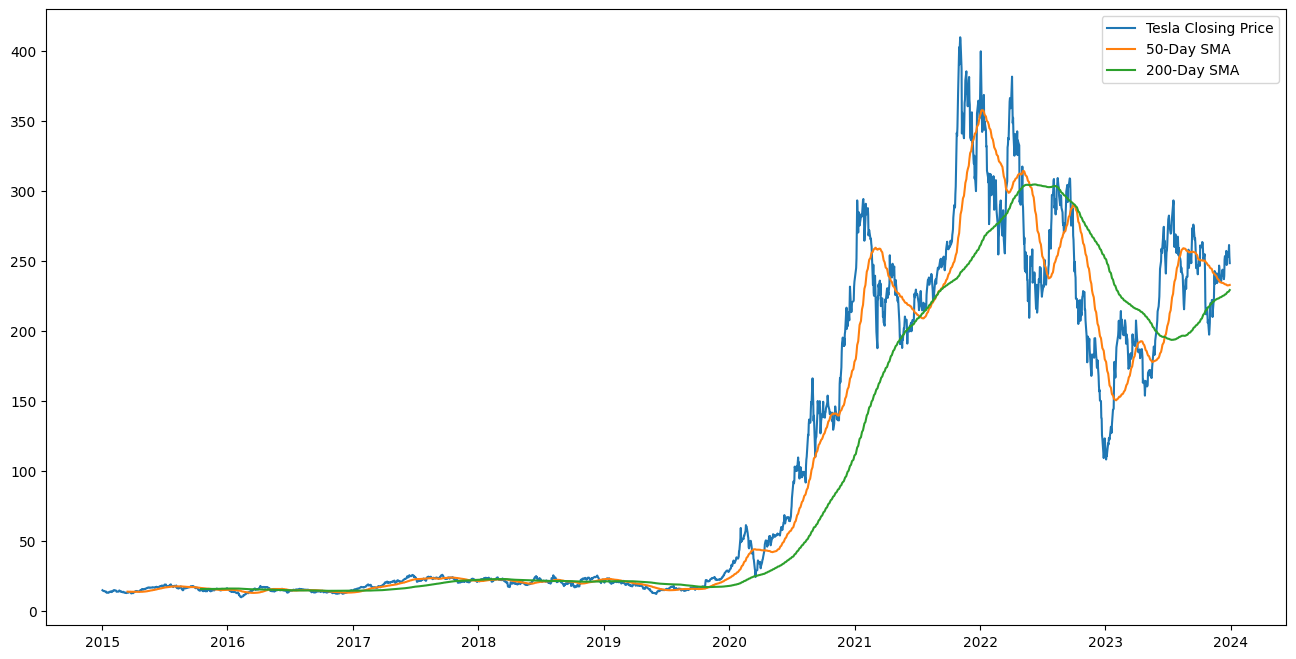

In [4]:
# Data visualization
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Tesla Closing Price')
plt.plot(df['SMA50'], label='50-Day SMA')
plt.plot(df['SMA200'], label='200-Day SMA')
plt.legend()
plt.show()

## Data preparation for AI models

In [5]:
# Preprocessing and sequence creation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

sequence_length = 60

In [6]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i : i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, sequence_length)

In [7]:
# Splitting data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## AI models for Stock Prediction

In [17]:
## Define AI models
## 1. RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])
rnn_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
import time
rnn_model.compile(optimizer='adam', loss='mse')
start_time=time.time()
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32)
training_time=time.time()-start_time
print(f"Total training time for RNN model is:{training_time}")
print("RNN model is saving.....")
rnn_model.save('tesla_rnn_model.h5')
print("RNN model is successfully saved!")

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 2.5583e-04
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.1316e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.1113e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.2204e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.4128e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.5168e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.7413e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4732e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.3761e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.5465e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.5601e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.2304e-04
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.9315e-04
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.3227e-04
Epoch 15/20
56/

Total training time for RNN model is:43.38630294799805
RNN model is saving.....
RNN model is successfully saved!


In [18]:
## 2. LSTM
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True,input_shape=(sequence_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
lstm_model.compile(optimizer='adam', loss='mse')
start_time=time.time()
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)
training_time = time.time() - start_time
print(f"LSTM Model Training Time: {training_time:.2f} seconds")
print("LSTM model is saving.....")
lstm_model.save('tesla_lstm_model.h5')
print("LSTM model is successfully saved!")

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0487
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0022
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0011
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 9.6049e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 9.6453e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 9.3565e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 9.7155e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0010
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 7.9857e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 7.6288e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 7.3278e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 8.7648e-04
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.9443e-04
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 6.0371e-04
Epoch 15/20
56/56 ━━━━━━━━━━━━━

LSTM Model Training Time: 97.19 seconds
RNN model is saving.....
RNN model is successfully saved!


In [21]:
# 3. GRU
gru_model = Sequential([
    GRU(50, activation='relu', return_sequences=True,input_shape=(sequence_length, 1)),
    GRU(50, activation='relu'),
    Dense(1)
])
gru_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
gru_model.compile(optimizer='adam', loss='mse')
start_time=time.time()
gru_model.fit(X_train, y_train, epochs=20, batch_size=32)
training_time = time.time() - start_time
print(f"GRU Model Training Time: {training_time:.2f} seconds")
print("GRU model is saving.....")
gru_model.save('tesla_gru_model.h5')
print("GRU model is saved successfully!")

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0489
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.7331e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 3.6592e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 3.9083e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.3821e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 2.9810e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6265e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 3.0484e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.9967e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.8390e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.9974e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.3784e-04
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.8146e-04
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 1.7710e-04
Epoch 15/20
56/56 

GRU Model Training Time: 100.40 seconds
GRU model is saving.....
GRU model is saved successfully!


## Comparison of Inference time

In [34]:
# Load models and run inference with time tracking
import time
from keras.models import load_model

model_paths = ['tesla_rnn_model.h5', 'tesla_lstm_model.h5', 'tesla_gru_model.h5']
model_names = ['RNN', 'LSTM', 'GRU']

predictions = {}
inference_times = {}

# Loop through models and record inference time
for model_path, model_name in zip(model_paths, model_names):
    model = load_model(model_path, compile=False)
    model.compile(optimizer='adam', loss='mse')

    start_infer = time.time()
    pred = model.predict(X_test)
    end_infer = time.time()

    predictions[model_name] = pred
    inference_times[model_name] = end_infer - start_infer

# Print inference times
for model_name, infer_time in inference_times.items():
    print(f'{model_name} Inference Time: {infer_time:.2f} seconds')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
RNN Inference Time: 0.75 seconds
LSTM Inference Time: 0.91 seconds
GRU Inference Time: 1.02 seconds


>**Observation: RNN is the winner in inference time test**

## Comparison of models using evaluation metrics

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from keras.models import load_model

model_paths = ['tesla_rnn_model.h5', 'tesla_lstm_model.h5', 'tesla_gru_model.h5']
model_names = ['RNN', 'LSTM', 'GRU']

predictions = {}
inference_times = {}

# Loop through models and record inference time and metrics
for model_path, model_name in zip(model_paths, model_names):
    model = load_model(model_path, compile=False)
    model.compile(optimizer='adam', loss='mse')

    start_infer = time.time()
    pred = model.predict(X_test)
    end_infer = time.time()

    predictions[model_name] = pred
    inference_times[model_name] = end_infer - start_infer

    # Reshape and inverse transform predictions
    pred = pred.reshape(-1, 1)
    pred = scaler.inverse_transform(pred)

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    # Print metrics
    print(f"{model_name} Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Inference Time: {inference_times[model_name]:.2f} seconds\n")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
RNN Metrics:
RMSE: 233.20
MAE: 227.80
R² Score: -3380285.92
Inference Time: 0.87 seconds

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
LSTM Metrics:
RMSE: 240.37
MAE: 235.47
R² Score: -3591548.33
Inference Time: 1.58 seconds

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
GRU Metrics:
RMSE: 237.91
MAE: 232.53
R² Score: -3518391.48
Inference Time: 1.05 seconds



>**Observarions:** Since the error values are extremly high and the $R^2$ value is negative, none of these models learn the pattern in the Tesla stock price. The main reason is that these models trained only 20 epochs in this large dataset. This obdervations will be confirmed through the following visualizations.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━

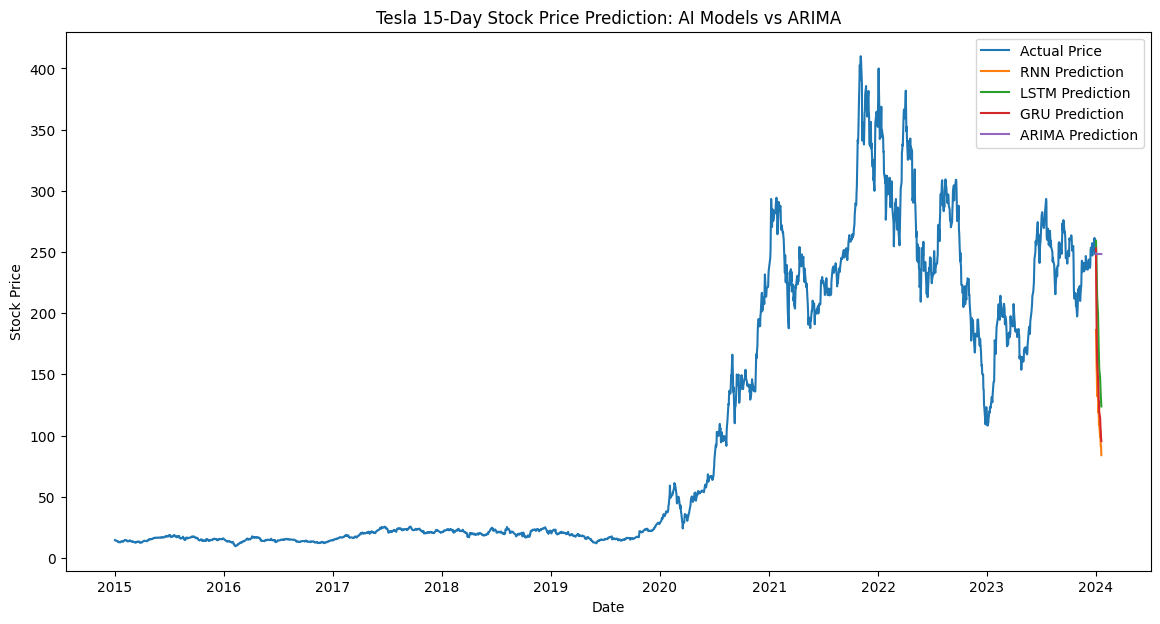

In [56]:
# Forecast 15 days ahead
future_steps = 15
arima_future = arima_model_fit.forecast(steps=future_steps)

# Create future sequences for AI models
future_inputs = scaled_data[-sequence_length:]

# Extend predictions for each model
rnn_future = []
lstm_future = []
gru_future = []

for _ in range(future_steps):
    rnn_pred = rnn_model.predict(future_inputs.reshape(1, sequence_length, 1)).flatten()
    lstm_pred = lstm_model.predict(future_inputs.reshape(1, sequence_length, 1)).flatten()
    gru_pred = gru_model.predict(future_inputs.reshape(1, sequence_length, 1)).flatten()

    rnn_future.append(rnn_pred)
    lstm_future.append(lstm_pred)
    gru_future.append(gru_pred)

    future_inputs = np.append(future_inputs[1:], rnn_pred.reshape(-1, 1), axis=0)

# Convert to numpy arrays and inverse transform
rnn_future = scaler.inverse_transform(np.array(rnn_future).reshape(-1, 1))
lstm_future = scaler.inverse_transform(np.array(lstm_future).reshape(-1, 1))
gru_future = scaler.inverse_transform(np.array(gru_future).reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[:], df['Close'].iloc[:], label='Actual Price')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], rnn_future, label='RNN Prediction')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], lstm_future, label='LSTM Prediction')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], gru_future, label='GRU Prediction')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], arima_future, label='ARIMA Prediction')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Tesla 15-Day Stock Price Prediction: AI Models vs ARIMA')
plt.show()

>**Observation:** From the prediction plot, its is clear that none of the AI models cature the stock price pattern!

## A zoomed version of the plot!

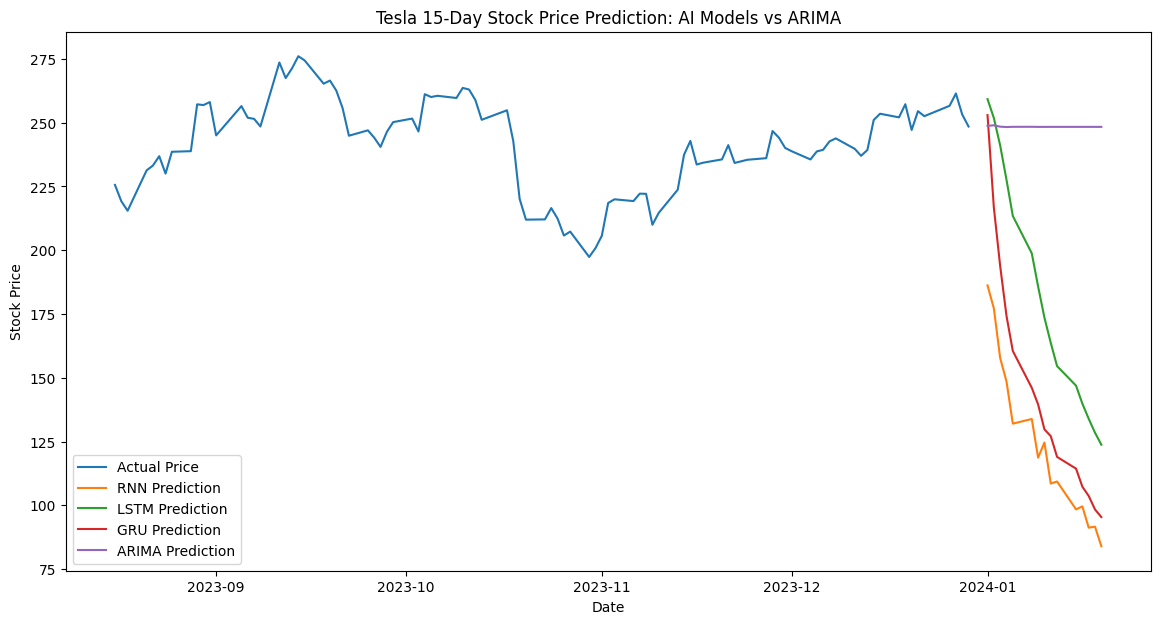

In [53]:
# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[-95:], df['Close'].iloc[-95:], label='Actual Price')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], rnn_future, label='RNN Prediction')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], lstm_future, label='LSTM Prediction')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], gru_future, label='GRU Prediction')
plt.plot(pd.date_range(start=df.index[-1], periods=future_steps+1, freq='B')[1:], arima_future, label='ARIMA Prediction')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Tesla 15-Day Stock Price Prediction: AI Models vs ARIMA')
plt.show()

## Conclusion:
From the model analysis, it is found that all the models must run atleast 50 to 100 epochs to learn the stock price pattern.


[*********************100%***********************]  1 of 1 completed


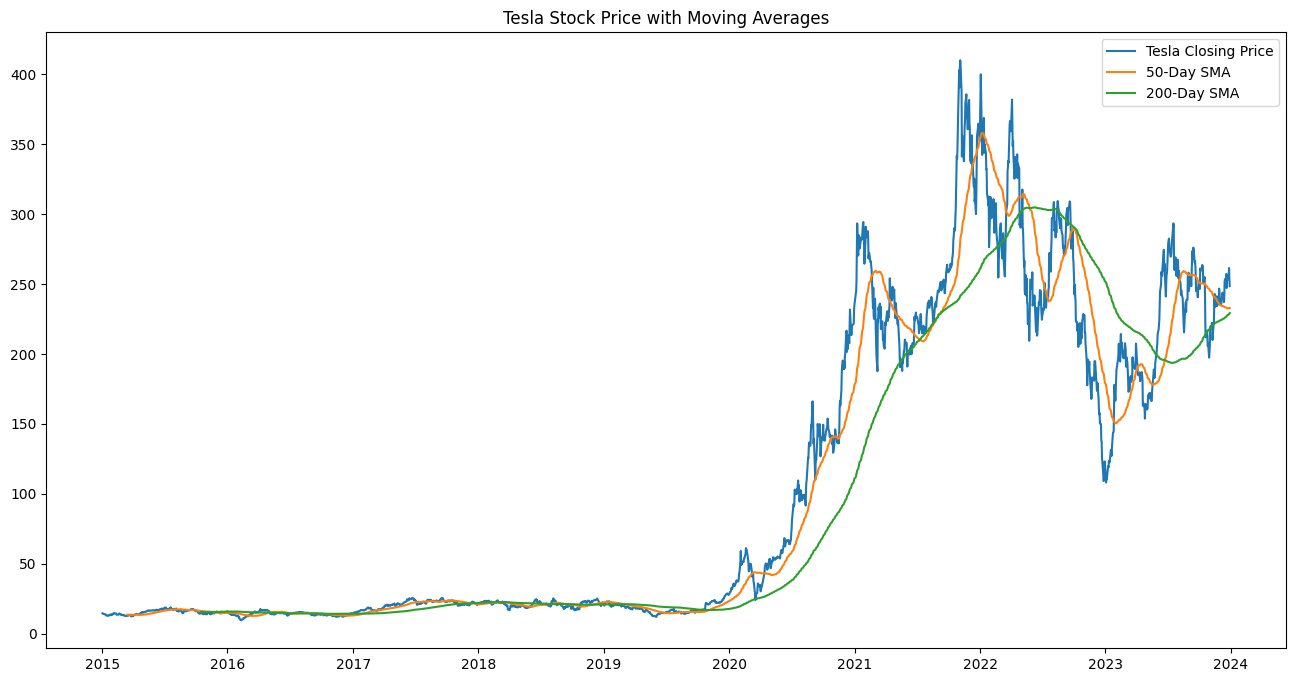

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training RNN model...
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.0846e-04 - val_loss: 0.0061
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.5088e-04 - val_loss: 0.0016
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.4709e-04 - val_loss: 0.0056
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.4972e-04 - val_loss: 0.0016
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.6963e-04 - val_loss: 0.0036
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.1632e-04 - val_loss: 0.0074
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.6119e-04 - val_loss: 0.0014
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.9457e-04 - val_loss: 0.0073
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.0554e-04 - val_loss: 0.0017
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.1192e-04 - val_loss: 0.0025
E

RNN Model Training Time: 105.15 seconds
Training LSTM model...
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - loss: 0.0040 - val_loss: 0.0302
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.7979e-04 - val_loss: 0.0103
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 1.9271e-04 - val_loss: 0.0057
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 2.9310e-04 - val_loss: 0.0052
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 8.7774e-04 - val_loss: 0.0120
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7850e-04 - val_loss: 0.0121
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 1.7175e-04 - val_loss: 0.0058
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 1.8964e-04 - val_loss: 0.0072
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.0411e-04 - val_loss: 0.0061
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.7097e-04 - val_loss: 0.0113
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/ste

LSTM Model Training Time: 209.95 seconds
Training GRU model...
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.0034e-04 - val_loss: 0.0030
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.8943e-04 - val_loss: 0.0066
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 2.0558e-04 - val_loss: 0.0032
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 2.3970e-04 - val_loss: 0.0017
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 2.1197e-04 - val_loss: 0.0023
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.9267e-04 - val_loss: 0.0020
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 3.2738e-04 - val_loss: 0.0016
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.6820e-04 - val_loss: 0.0014
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 1.6413e-04 - val_loss: 0.0059
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/ste

GRU Model Training Time: 223.70 seconds


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [60]:
# full code to save as a .py file to upload in GitHub.


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Fetch Tesla stock data
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-01-01'

df = yf.download(ticker, start=start_date, end=end_date)

# Initial analysis of Tesla stock price
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()
df['Returns'] = df['Close'].pct_change()

# Data visualization
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Tesla Closing Price')
plt.plot(df['SMA50'], label='50-Day SMA')
plt.plot(df['SMA200'], label='200-Day SMA')
plt.legend()
plt.title('Tesla Stock Price with Moving Averages')
plt.show()

# Preprocessing and sequence creation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

sequence_length = 60

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i : i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, sequence_length)

# Splitting data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define AI models
def build_rnn_model():
    model = Sequential([
        SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.2),
        SimpleRNN(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    return model

def build_lstm_model():
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    return model

def build_gru_model():
    model = Sequential([
        GRU(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.2),
        GRU(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    return model

# Compile and train models
models = {
    'RNN': build_rnn_model(),
    'LSTM': build_lstm_model(),
    'GRU': build_gru_model()
}

for model_name, model in models.items():
    model.compile(optimizer='adam', loss='mse')
    print(f"Training {model_name} model...")
    start_time = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
    training_time = time.time() - start_time
    print(f"{model_name} Model Training Time: {training_time:.2f} seconds")
    model.save(f'tesla_{model_name.lower()}_model.h5')

# Evaluate models
predictions = {}
metrics = {}

for model_name, model in models.items():
    model = load_model(f'tesla_{model_name.lower()}_model.h5',compile=False)
    model.compile(optimizer='adam', loss='mse')
    start_infer = time.time()
    pred = model.predict(X_test)
    end_infer = time.time()

    # Inverse transform predictions
    pred = scaler.inverse_transform(pred.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test_actual, pred))
    mae = mean_absolute_error(y_test_actual, pred)
    r2 = r2_score(y_test_actual, pred)

    # Store results
    predictions[model_name] = pred
    metrics[model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Inference Time': end_infer - start_infer
    }

    # Print metrics
    print(f"{model_name} Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Inference Time: {metrics[model_name]['Inference Time']:.2f} seconds\n")

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_actual, label='Actual Price')
for model_name, pred in predictions.items():
    plt.plot(df.index[-len(y_test):], pred, label=f'{model_name} Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Tesla Stock Price Prediction: RNN vs LSTM vs GRU')
plt.show()

# Compare model performance
for model_name, metric in metrics.items():
    print(f"{model_name} Performance:")
    print(f"RMSE: {metric['RMSE']:.2f}")
    print(f"MAE: {metric['MAE']:.2f}")
    print(f"R² Score: {metric['R²']:.2f}")
    print(f"Inference Time: {metric['Inference Time']:.2f} seconds\n")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


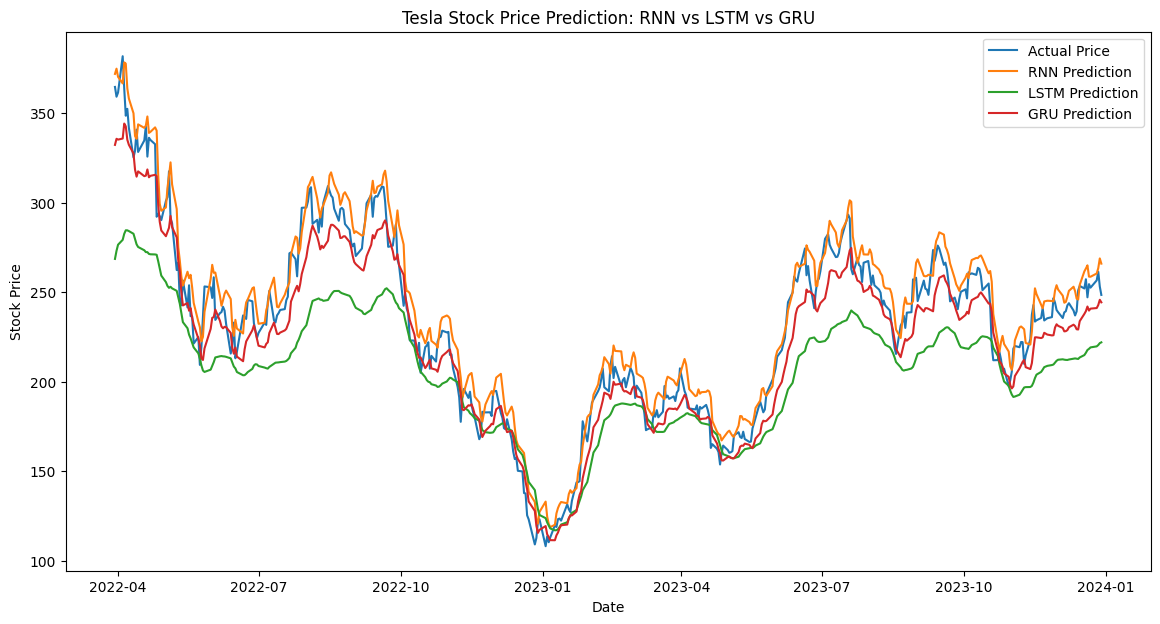

RNN Performance:
RMSE: 12.63
MAE: 10.26
R² Score: 0.94
Inference Time: 2.60 seconds

LSTM Performance:
RMSE: 32.56
MAE: 26.89
R² Score: 0.59
Inference Time: 1.32 seconds

GRU Performance:
RMSE: 13.95
MAE: 11.39
R² Score: 0.92
Inference Time: 1.32 seconds



In [62]:
# Evaluate models
predictions = {}
metrics = {}

for model_name, model in models.items():
    model = load_model(f'tesla_{model_name.lower()}_model.h5',compile=False)
    model.compile(optimizer='adam', loss='mse')
    start_infer = time.time()
    pred = model.predict(X_test)
    end_infer = time.time()

    # Inverse transform predictions
    pred = scaler.inverse_transform(pred.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test_actual, pred))
    mae = mean_absolute_error(y_test_actual, pred)
    r2 = r2_score(y_test_actual, pred)

    # Store results
    predictions[model_name] = pred
    metrics[model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Inference Time': end_infer - start_infer
    }

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_actual, label='Actual Price')
for model_name, pred in predictions.items():
    plt.plot(df.index[-len(y_test):], pred, label=f'{model_name} Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Tesla Stock Price Prediction: RNN vs LSTM vs GRU')
plt.show()

# Compare model performance
for model_name, metric in metrics.items():
    print(f"{model_name} Performance:")
    print(f"RMSE: {metric['RMSE']:.2f}")
    print(f"MAE: {metric['MAE']:.2f}")
    print(f"R² Score: {metric['R²']:.2f}")
    print(f"Inference Time: {metric['Inference Time']:.2f} seconds\n")

## Comparison of 5 days stock price prediction with all trained models

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


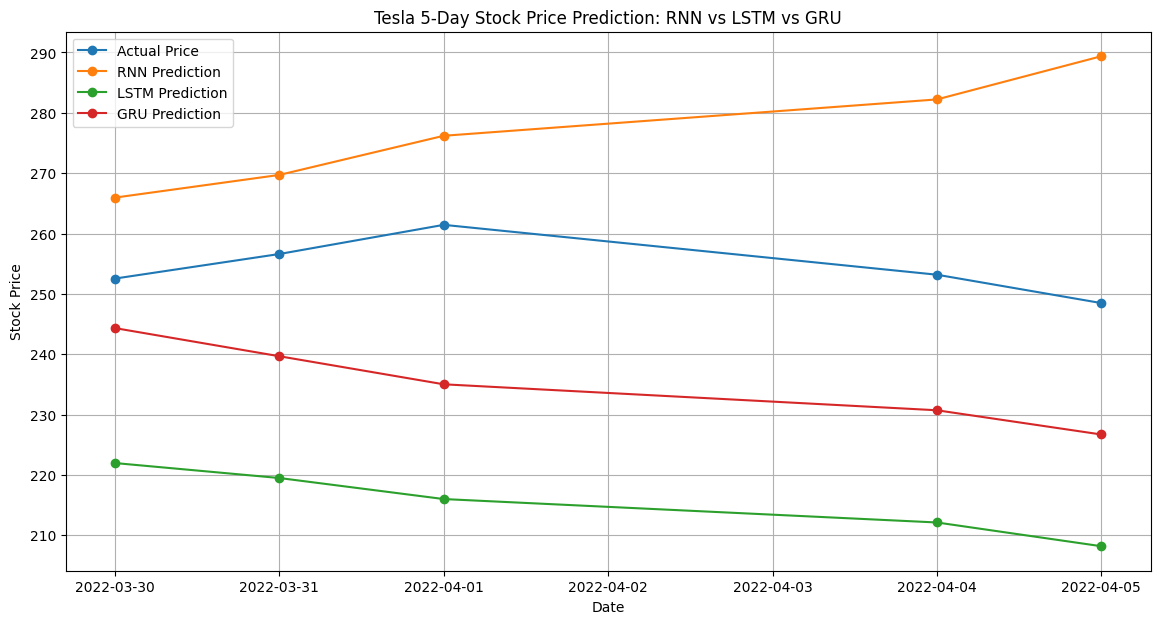

In [65]:
# Function to load models and generate 5-day predictions
def load_models_and_predict(models_to_load, X_input, scaler, days_ahead=5):
    predictions = {}
    for model_name in models_to_load:
        model = load_model(f'tesla_{model_name.lower()}_model.h5', compile=False)
        model.compile(optimizer='adam', loss='mse')

        # Ensure X_input is in the correct shape (num_samples, sequence_length, num_features)
        if len(X_input.shape) == 2:
            X_input = X_input.reshape((X_input.shape[0], X_input.shape[1], 1))

        # Use the last sequence from the input data
        future_input = X_input[-1]  # Shape: (sequence_length, 1)
        future_predictions = []

        for _ in range(days_ahead):
            # Reshape input to match model's expected input shape (batch_size, sequence_length, features)
            pred = model.predict(future_input.reshape(1, sequence_length, 1))
            future_predictions.append(pred[0][0])  # Append the predicted value

            # Update input for next prediction by removing the first element and appending the new prediction
            future_input = np.append(future_input[1:], pred, axis=0)

        # Inverse transform predictions to original scale
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
        predictions[model_name] = future_predictions

    return predictions

# Load models and generate 5-day predictions
models_to_load = ['RNN', 'LSTM', 'GRU']
predictions = load_models_and_predict(models_to_load, X_test, scaler, days_ahead=5)

# Plot 5-day predictions along with actual values
plt.figure(figsize=(14, 7))

# Get the last 5 actual values from the test set
actual_values = scaler.inverse_transform(y_test[-5:].reshape(-1, 1))

# Generate dates for the last 5 days of the test set
last_date = df.index[-len(y_test)]
dates = pd.date_range(start=last_date, periods=5, freq='B')

# Plot actual values
plt.plot(dates, actual_values, label='Actual Price', marker='o')

# Plot predictions for each model
for model_name, pred in predictions.items():
    plt.plot(dates, pred, label=f'{model_name} Prediction', marker='o')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Tesla 5-Day Stock Price Prediction: RNN vs LSTM vs GRU')
plt.grid()
plt.show()

## Conclusion:
 The actual stock price is in between the RNN and GRU predictions. LSTM prediction in this case is far away from actual and is an under estimated pattern. Further hyper parameter tuning and inclusion of more layers may give better prediction.